In [156]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from sklearn.metrics import mean_squared_error
from patsy import dmatrix
from scipy import interpolate

In [157]:
# read dataset
data = pd.read_csv("uswages.csv")
data.head()

,Unnamed: 0,wage,educ,exper,race,smsa,ne,mw,so,we,pt
0,6085,771.60,18,18,0,1,1,0,0,0,0
1,23701,617.28,15,20,0,1,0,0,0,1,0
2,16208,957.83,16,9,0,1,0,0,1,0,0
3,2720,617.28,12,24,0,1,1,0,0,0,0
4,9723,902.18,14,12,0,1,0,1,0,0,0


In [158]:
## data exploration ##
data.describe()

,Unnamed: 0,wage,educ,exper,race,smsa,ne,mw,so,we,pt
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,14015.171000,608.117865,13.111000,18.410500,0.078000,0.7560,0.229000,0.248500,0.312500,0.21000,0.092500
std,8099.947724,459.832629,3.004196,13.375778,0.268239,0.4296,0.420294,0.432251,0.463628,0.40741,0.289803
min,7.000000,50.390000,0.000000,-2.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7028.750000,308.640000,12.000000,8.000000,0.000000,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,13946.500000,522.320000,12.000000,15.000000,0.000000,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,21117.250000,783.480000,16.000000,27.000000,0.000000,1.0000,0.000000,0.000000,1.000000,0.00000,0.000000
max,28140.000000,7716.050000,18.000000,59.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.00000,1.000000


In [159]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
Unnamed: 0    2000 non-null int64
wage          2000 non-null float64
educ          2000 non-null int64
exper         2000 non-null int64
race          2000 non-null int64
smsa          2000 non-null int64
ne            2000 non-null int64
mw            2000 non-null int64
so            2000 non-null int64
we            2000 non-null int64
pt            2000 non-null int64
dtypes: float64(1), int64(10)
memory usage: 172.0 KB
None


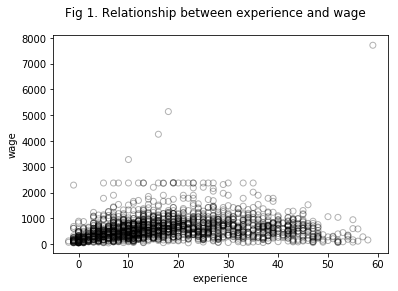

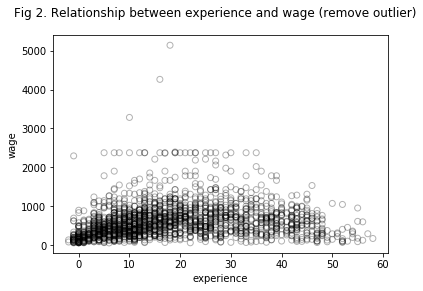

In [263]:
## exper vs wage ##
data_x = data[['exper']]
data_y = data[['wage']]

#visualize the relationship between experience and wage
plt.scatter(data_x, data_y, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.suptitle('Fig 1. Relationship between experience and wage', fontsize=12)
plt.xlabel('experience')
plt.ylabel('wage')
plt.show()

# remove outlier
data_ylim = data.loc[data['wage']<= 7000]
wage = data_ylim[['wage']]
exper_x = data_ylim[['exper']]

#visualize the relationship between experience and wage
plt.scatter(exper_x, wage, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.suptitle('Fig 2. Relationship between experience and wage (remove outlier)', fontsize=12)
plt.xlabel('experience')
plt.ylabel('wage')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     59.88
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.59e-14
Time:                        16:21:29   Log-Likelihood:                -14935.
No. Observations:                1999   AIC:                         2.987e+04
Df Residuals:                    1997   BIC:                         2.989e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        503.1140     16.198     31.060      0.0

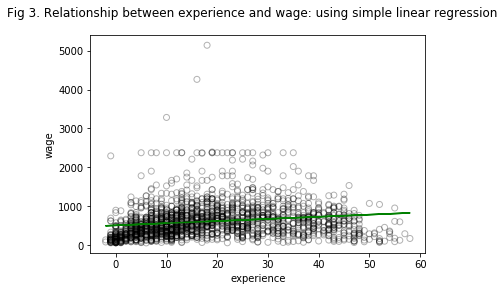

425.13535436123


In [264]:
# test model with simple linear regression

#add an intercept (beta_0) to our model
exper_x = sm.add_constant(exper_x)  

# model fitting
model = sm.OLS(wage, exper_x).fit()
print(model.summary())

# find fitted value
predictions1 = model.predict(exper_x) 

# data visualization
plt.scatter(exper_x['exper'], wage, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.plot(exper_x['exper'], predictions1, color = 'green', linewidth = 1.5)
plt.suptitle('Fig 3. Relationship between experience and wage: using simple linear regression', fontsize=12)
plt.xlabel('experience')
plt.ylabel('wage')
plt.show()

# Calculating RMSE value
rms1 = sqrt(mean_squared_error(wage, predictions1))
print(rms1)

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.65e-62
Time:                        16:21:18   Log-Likelihood:                -14822.
No. Observations:                1999   AIC:                         2.965e+04
Df Residuals:                    1996   BIC:                         2.967e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        268.2870     21.573     12.436      0.0

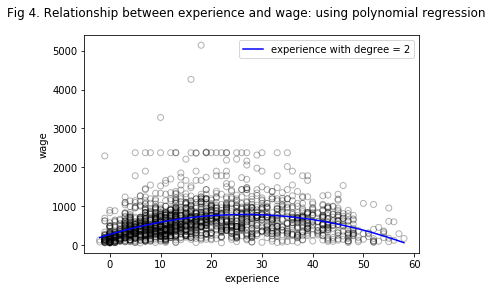

401.78144699617144


In [261]:
# refit model using polynomial regression
# "exper" with degree = 2

exper_x['exper2'] = np.power(exper_x['exper'], 2)

# model fitting
model2 = sm.OLS(wage, exper_x).fit()
print(model2.summary())

# find fitted value
predictions2 = model2.predict(exper_x)


# reduce samples down to 100
x_lim = np.linspace(start = exper_x['exper'].min(), stop = exper_x['exper'].max(), num = 100)
x_lim_df = pd.DataFrame({'exper':x_lim})
x_lim_df['exper2'] = np.power(x_lim_df['exper'], 2)
x_lim_df = sm.add_constant(x_lim_df) 

# find fitted value using x_lim
fit_reduce = model2.predict(x_lim_df)

# data visualization
plt.scatter(exper_x['exper'], wage, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.plot(x_lim_df[['exper']], fit_reduce, color = 'blue', linewidth = 1.5, label='experience with degree = 2')
plt.legend()
plt.suptitle('Fig 4. Relationship between experience and wage: using polynomial regression', fontsize=12)
plt.xlabel('experience')
plt.ylabel('wage')
plt.show()

# Calculating RMSE value
rms2 = sqrt(mean_squared_error(wage, predictions2))
print(rms2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   wage   No. Observations:                 1999
Model:                            GLM   Df Residuals:                     1991
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                      1.6183e+05
Method:                          IRLS   Log-Likelihood:                -14821.
Date:                Sun, 25 Nov 2018   Deviance:                   3.2220e+08
Time:                        16:21:13   Pearson chi2:                 3.22e+08
No. Iterations:                     3   Covariance Type:             nonrobust
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                        

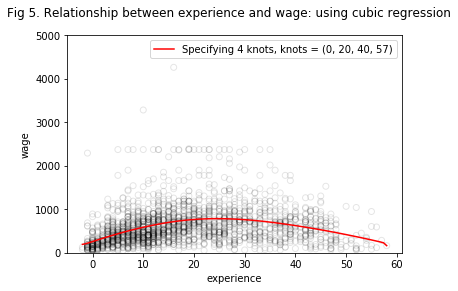

401.4743219404939


In [260]:
## cubic regression ##
# cubic spline with 4 knots at 0, 20, 40, 57
cubic_x = dmatrix("bs(data, knots = (0, 20, 40, 57), include_intercept = False)", {"data": exper_x[['exper']]}, return_type = 'dataframe')
model3 = sm.GLM(wage, cubic_x).fit()
print(model3.summary())

# find fitted value
predictions3 = model3.predict(cubic_x)

# reduce samples down to 100
x_lim = np.linspace(start = exper_x[['exper']].min(), stop = exper_x[['exper']].max(), num = 100)


# find fitted value using x_lim
fit_reduce2 = model3.predict(dmatrix(formula_like = "bs(train, knots = (0, 20, 40, 57), include_intercept = False)", data = {"train": x_lim}, return_type = 'dataframe'))

# plot spline
plt.scatter(exper_x[['exper']], wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(x_lim, fit_reduce2, color='r', linewidth = 1.5, label='Specifying 4 knots, knots = (0, 20, 40, 57)')
plt.legend()
plt.suptitle('Fig 5. Relationship between experience and wage: using cubic regression', fontsize=12)
plt.ylim(0, 5000)
plt.xlabel('experience')
plt.ylabel('wage')
plt.show()

# Calculating RMSE value
rms3 = sqrt(mean_squared_error(wage, predictions3))
print(rms3)

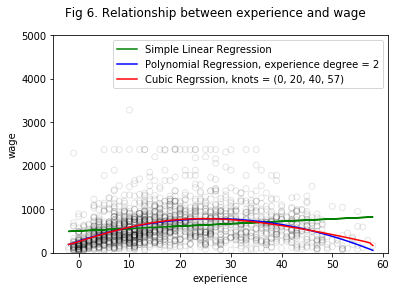

In [259]:
## summary ##
# overlay three regression curve
plt.scatter(exper_x[['exper']], wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(exper_x['exper'], predictions1, color = 'green', linewidth = 1.5, label = 'Simple Linear Regression')
plt.plot(x_lim_df['exper'], fit_reduce, color = 'blue', linewidth = 1.5, label='Polynomial Regression, experience degree = 2')
plt.plot(x_lim, fit_reduce2, color='r', linewidth = 1.5, label='Cubic Regrssion, knots = (0, 20, 40, 57)')
plt.legend()
plt.suptitle('Fig 6. Relationship between experience and wage', fontsize=12)
plt.ylim(0, 5000)
plt.xlabel('experience')
plt.ylabel('wage')
plt.show()

In [252]:
# compare mse
model = ['SLR', 'Polynomial', 'Spline']
RMSE = [rms1, rms2, rms3]
compare = pd.DataFrame({'Model':model, 'RMSE':RMSE})
print(compare)

        Model        RMSE
0         SLR  425.135354
1  Polynomial  401.781447
2      Spline  401.474322
